In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [27]:
# Create a dataframe out of the ones for a specified step size 
import gzip 
import re
step_size = 15

specified_files = []
for file in gz_files:    
    pattern = re.compile(f'sim_outputs_{step_size}_[0-9]+\.txt\.gz')

    if bool(pattern.match(file)):
        specified_files.append(file)

sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_13661/1806833139.py:10: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'sim_outputs_{step_size}_[0-9]+\.txt\.gz')


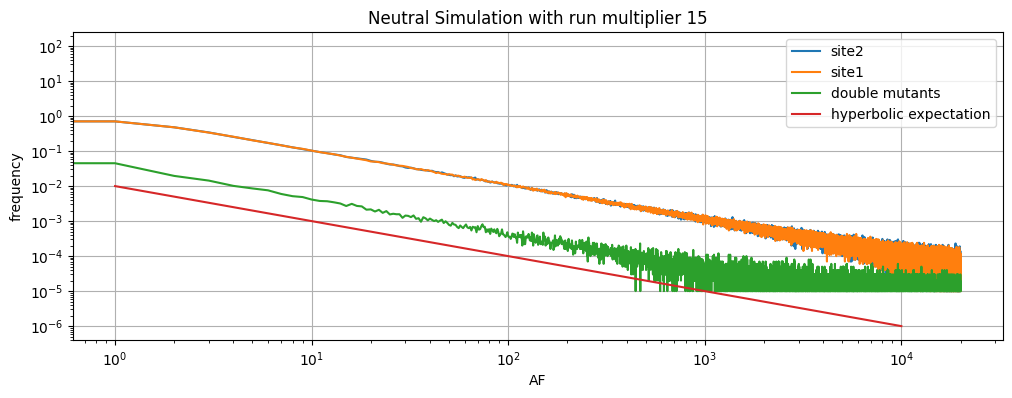

In [28]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

x = np.linspace(1, 10000, 10000)
y = 0.01/x

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])


plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
plt.plot(x, y, label="hyperbolic expectation")

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF")
plt.ylabel("frequency")
plt.title(f"Neutral Simulation with run multiplier {step_size}")
plt.savefig(f"plots/neutral_sim_AFs_{step_size}.pdf")
plt.show()

## Selection plots

In [3]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs/selection/single'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

filename = 'betas_old.txt'
beta_vals = np.loadtxt(filename, delimiter='\t', dtype=float)
beta_vals = beta_vals.tolist()

# beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]

In [4]:
# We now proceed to get all dataframes for a specific site pair
import re

def buildDF(site_1, gz_files, site_2=None):
    if site_2:
        pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')
    else:
        pattern = re.compile(f'sim_outs_single_{site_1}_[0-9]+\.txt\.gz')
    specified_files = []
    for file in gz_files:    
        if bool(pattern.match(file)):
            specified_files.append(file)

    # Build the dataframe
    df_list = [pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip') for file in specified_files]
    sim_df = pd.concat(df_list)

    return sim_df


<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_32486/2369049912.py:6: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')
/tmp/ipykernel_32486/2369049912.py:8: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'sim_outs_single_{site_1}_[0-9]+\.txt\.gz')


In [7]:
# # Let's create folders for all of the pairs of values
# import os

# parent_dir = './plots/selection/'
# for i in range(10):
#     for j in range(i, 10):
#         directory = f'{i}_{j}'
#         path = os.path.join(parent_dir, directory)
#         os.mkdir(path)

,beta_1,beta_2,N00,N01,N10,N11
0,0.002108,-0.002108,19678,0,322,0
1,-0.002108,-0.002108,20000,0,0,0
2,0.002108,-0.002108,20000,0,0,0
3,-0.002108,0.002108,20000,0,0,0
4,-0.002108,-0.002108,20000,0,0,0
...,...,...,...,...,...,...
19995,-0.002108,0.002108,20000,0,0,0
19996,0.002108,-0.002108,20000,0,0,0
19997,-0.002108,-0.002108,19915,85,0,0
19998,0.002108,-0.002108,20000,0,0,0


In [35]:
# Finally, we plot after subsetting for the signage we want
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

def buildSelectionPlot(beta_vals, sim_df, site_1, site_2, concordant, N=20000, save=False):
    if concordant:
        sim_df = sim_df[((sim_df['beta_1'] > 0) * (sim_df['beta_2'] > 0)) + ((sim_df['beta_1'] < 0) * (sim_df['beta_2'] < 0))]
        label = 'concordant'
    else:
        sim_df = sim_df[((sim_df['beta_1'] < 0) * (sim_df['beta_2'] > 0)) + ((sim_df['beta_1'] > 0) * (sim_df['beta_2'] < 0))]
        label = 'discordant'

    # x = np.linspace(1, 10000, 10000)
    # y = 0.01/x

    ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
    ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
    ks_3, vs_3 = line_scat(sim_df["N11"])

    # Divide by N
    ks_1 = [x/N for x in ks_1]
    ks_2 = [x/N for x in ks_2]
    ks_3 = [x/N for x in ks_3]

    plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
    plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
    plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
    # plt.plot(x, y, label="hyperbolic expectation")

    # We draw the 1/s drift barrier as well. First, we calculate s
    barrier_1 = 1/(N*beta_vals[site_1]**2)
    plt.axvline(x=barrier_1)

    if site_2 != site_1:
        barrier_2 = 1/(N*beta_vals[site_2]**2)
        plt.axvline(x=barrier_2)

    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.legend()
    plt.xlabel("AF")
    plt.ylabel("frequency")
    plt.title(f"Simulation with beta_1 = {beta_vals[site_1]} and beta_2 = {beta_vals[site_2]}")
    if save:
        plt.savefig(f"plots/selection/{site_1}_{site_2}/selection_sim_AFs_{site_1}_{site_2}_{label}.pdf")
        plt.close()


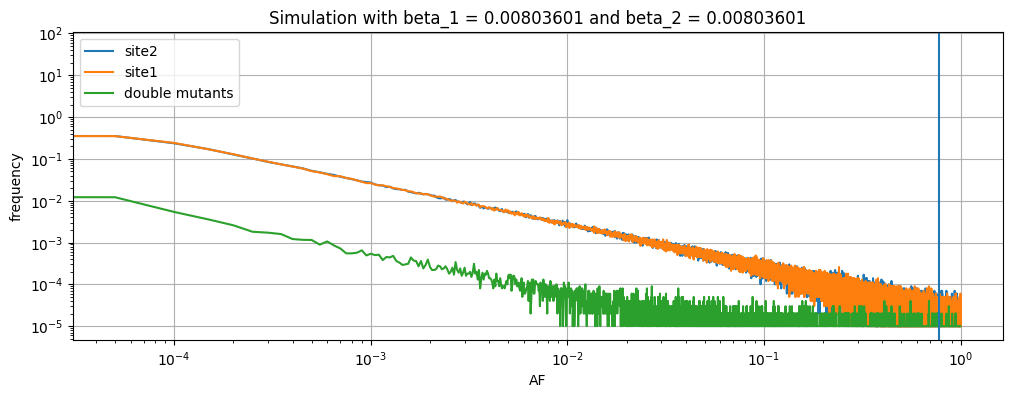

In [38]:
site_1 = 2
site_2 = 2
sim_df = buildDF(site_1, gz_files, site_2=site_2)
buildSelectionPlot(beta_vals, sim_df, site_1, site_2, False, N=20000)

In [5]:
import re

# Let's make plots for all pairs and all signs
for site_1 in range(10):
    for site_2 in range(site_1, 10):
        # Build the dataframes
        pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

        specified_files = []
        for file in gz_files:    
            if bool(pattern.match(file)):
                specified_files.append(file)

        # Build the dataframe
        sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

        for file in specified_files[1:]:
            try:
                new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
                sim_df = pd.concat([sim_df, new_df])
            except:
                print(f"error file {file}")
        
        # Now plot what we want
        for concordant in [True, False]:
            buildSelectionPlot(beta_vals, sim_df, site_1, site_2, concordant)  

        print(f'finished pair ({site_1}, {site_2})')

<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_17843/2265628779.py:7: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')


finished pair (0, 0)
finished pair (0, 1)
finished pair (0, 2)
finished pair (0, 3)
finished pair (0, 4)
finished pair (0, 5)
finished pair (0, 6)
finished pair (0, 7)
finished pair (0, 8)
finished pair (0, 9)
finished pair (1, 1)
finished pair (1, 2)
finished pair (1, 3)
finished pair (1, 4)
finished pair (1, 5)
finished pair (1, 6)
finished pair (1, 7)
finished pair (1, 8)
finished pair (1, 9)
finished pair (2, 2)
finished pair (2, 3)
finished pair (2, 4)
finished pair (2, 5)
finished pair (2, 6)
finished pair (2, 7)
finished pair (2, 8)
finished pair (2, 9)
finished pair (3, 3)
finished pair (3, 4)
finished pair (3, 5)
finished pair (3, 6)
finished pair (3, 7)
finished pair (3, 8)
finished pair (3, 9)
finished pair (4, 4)
finished pair (4, 5)
finished pair (4, 6)
finished pair (4, 7)
finished pair (4, 8)
finished pair (4, 9)
finished pair (5, 5)


## Integrating the SFS

/tmp/ipykernel_982/1753988885.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


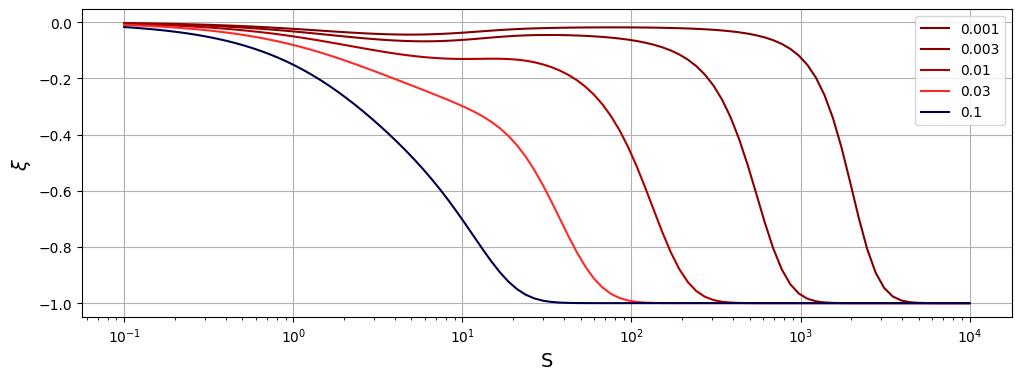

In [2]:
# This is the code to calculate the correlations from selection vals
import numpy as np
import scipy as sp
from scipy.special import erf
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize, LogNorm


def sfs_ud_params_sigma(xx, theta, S_ud):
    """Calculate the intensity of the site frequency spectrum under underdominant selection."""
    S_ud = np.abs(S_ud) + 1e-8
    return (theta*np.exp(-S_ud*xx*(1-xx))/(xx*(1-xx))*
                 (1 + erf(np.sqrt(S_ud)*(0.5-xx))/
                 erf(np.sqrt(S_ud)/2)))

ud_burden = lambda xx, theta, sigma: xx*sfs_ud_params_sigma(xx, theta, sigma)

def poly_prob(yy, sigma):
    return sp.integrate.quad(sfs_ud_params_sigma, yy, 1-yy, args=(1, sigma))[0]

def ex_burden(sigma):
    return sp.integrate.quad(ud_burden, 0, 1, args=(1, sigma))[0]

def stab_corr(yy, sigma):
    burd = ex_burden(sigma)
    neut_prob = poly_prob(yy, 0)
    double_prob = poly_prob(yy, 4*sigma)
    single_prob = poly_prob(yy, sigma)
    return burd * (double_prob - neut_prob) / (burd * (double_prob + neut_prob) + single_prob**2)

cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 100)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.show()

In [4]:
filename = 'betas.txt'
beta_vals = np.loadtxt(filename, delimiter='\t', dtype=float)
beta_vals = beta_vals.tolist()

In [31]:
# specified_files
# df_list = [pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip') for file in specified_files]
# sim_df = pd.concat(df_list)

# # df_list = []
# for file in specified_files:
#     print(file)
#     df_list.append(pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip'))

# pd.read_csv(mypath + f'/sim_outs_single_0_100.txt.gz', sep='\t', compression='gzip')

EmptyDataError: No columns to parse from file

In [7]:
## We're going to work with the simulations to plot the above curves
# 1. Find all instances where both variants satisfy the MAF threshold
# 2. Calculate correlations
# 3. Calculate the selection coefficients
# 4. Plot and use Fisher transformation for error bars
from scipy.stats import pearsonr

# Step 1
# beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]
MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]

corr_df = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
sample_df = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
for site in np.arange(len(beta_vals)):
    print(site)
    sim_df = pd.read_csv(f'/n/scratch/users/s/sjg319/dataframes/sim_dfs/sim_{site}_{site}.csv', sep='\t')
    sim_df[['N00', 'N01', 'N10', 'N11']] /= 20000
    for i, MAF_thr in enumerate(MAF_thr_values):
        sub_df = sim_df[(sim_df['N11'] + sim_df['N10']) > MAF_thr]
        sub_df = sub_df[(sub_df['N11'] + sub_df['N01']) > MAF_thr]

        # Step 2, calculate the correlation and store
        r = pearsonr(sub_df['beta_1'], sub_df['beta_2'])
        corr_df.iloc[i, site] = r[0]
        sample_df.iloc[i, site] = len(sub_df)

0


In [61]:
# Change the corr_df axis so it's based on selection instead of beta
# new_cols = [40000 * x**2 for x in beta_vals]
# corr_df.columns = new_cols

# corr_df

# Let's build error bars for each data point
z = 1.96
z_df = 0.5*np.log((1 + corr_df)/(1-corr_df))
top_df = z_df + z/(np.sqrt(sample_df * (sample_df-3)))
bottom_df = z_df - z/(np.sqrt(sample_df * (sample_df-3)))

/home/sjg319/.conda/envs/py311/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/sjg319/.conda/envs/py311/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


,0.002236,0.004239,0.008036,0.015234,0.028880,0.054749,0.103789,0.196757,0.372999,0.707107
0.001,-0.002760,-0.018464,-0.034724,-0.036890,-0.015999,-0.024438,0.029962,0.073470,-inf,-inf
0.003,-0.006781,-0.023015,-0.060428,-0.056508,-0.046543,-0.109194,-0.330556,-18.058497,-inf,-inf
0.010,-0.009788,-0.033465,-0.098493,-0.125885,-0.154301,-0.632781,-18.304060,-inf,-inf,-inf
0.030,-0.029245,-0.057810,-0.171829,-0.300102,-0.771069,-inf,-18.069801,NaN,NaN,-inf
0.100,-0.049147,-0.114985,-0.406496,-1.154448,-18.356338,-18.664026,-18.557033,NaN,NaN,-inf


/tmp/ipykernel_26078/1482214969.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('seismic_r')


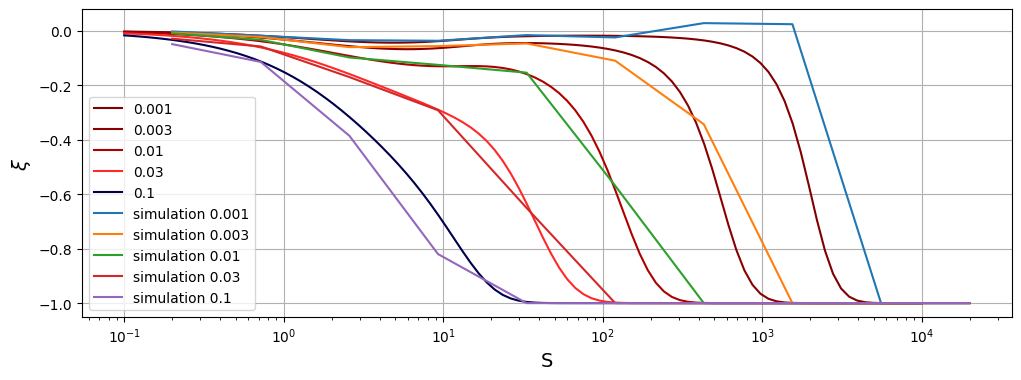

In [38]:
# corr_df.to_csv('dataframes/corr_csv', sep='\t')
# corr_df.T.plot()
# plt.xscale("log")
# corr_df.iloc[:, -1] = -1

cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 100)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

for ind in corr_df.index:
    plt.plot(corr_df.columns, corr_df.loc[ind, :], label=(f'simulation {ind}'))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.show()